In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Scaling Processers
import sklearn.preprocessing

import env
import acquireZillow

In [2]:
train, validate, test = acquireZillow.wrangle_zillow()
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561,248240.0,1973.0,2504.40,6059.0
2004969,3.0,2.0,1770,88390.0,1960.0,1671.93,6037.0
306031,2.0,1.0,1452,81169.0,1946.0,1310.88,6037.0
1038594,3.0,1.0,1000,119174.0,1950.0,1900.28,6037.0
270959,3.0,2.0,1974,432268.0,1988.0,5315.27,6037.0


In [33]:
train.taxvaluedollarcnt.min()

22

## Min-Max Scaler

In [4]:
# 1. create the object
scaler_min_max = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler_min_max.fit(train[['bedrooms', 'taxamount']])

# 3. use the object (use the min, max to do the transformation)

scaled_bill = scaler_min_max.transform(train[['bedrooms', 'taxamount']])
scaled_bill[:10]

array([[0.66666667, 0.23984259],
       [0.33333333, 0.15946863],
       [0.        , 0.1246097 ],
       [0.33333333, 0.18151555],
       [0.33333333, 0.51122862],
       [0.        , 0.19076878],
       [0.33333333, 0.12972292],
       [0.        , 0.67897342],
       [0.33333333, 0.24370164],
       [0.33333333, 0.10290361]])

In [5]:
# assign the scaled values as new columns in the train
train[['bedrooms_scaled', 'taxamount_scaled']] = scaled_bill

In [6]:
# Create them on the test and validate
test[['bedrooms_scaled', 'taxamount_scaled']] = scaler_min_max.transform(test[['bedrooms', 'taxamount']])
validate[['bedrooms_scaled', 'taxamount_scaled']] = scaler_min_max.transform(validate[['bedrooms', 'taxamount']])

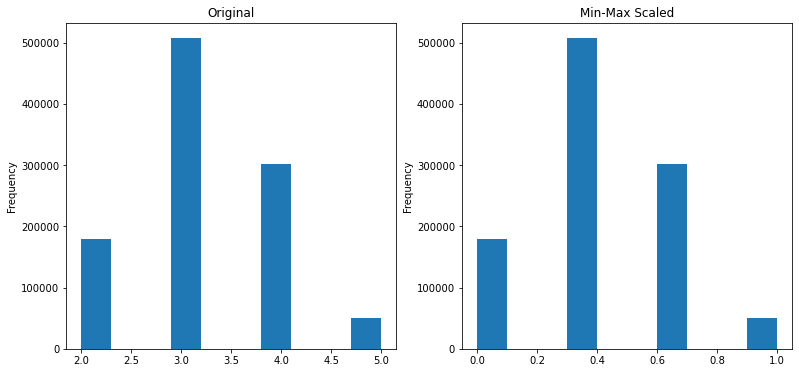

In [7]:
# Visualize the un-scaled and scaled distribution for total_bill

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.bedrooms.plot.hist(title='Original')

#subplot 2
plt.subplot(122)
train.bedrooms_scaled.plot.hist(title='Min-Max Scaled');

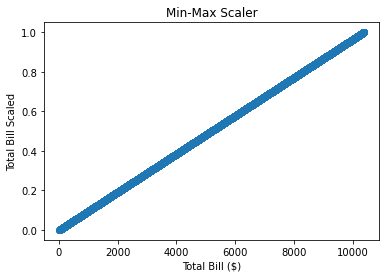

In [8]:
# Visualize the scaling taxamount:

plt.scatter(train.taxamount, train.taxamount_scaled)
plt.xlabel('Total Bill ($)')
plt.ylabel('Total Bill Scaled')
plt.title('Min-Max Scaler');

## Standard Scaler

In [10]:
# 1. create the object
scaler_standard = sklearn.preprocessing.StandardScaler()

# 2. fit the object
scaler_standard.fit(train[['tax_value']])

# 3. use the object. Scale total_bill only
train['tax_value_scaled'] = scaler_standard.transform(train[['tax_value']])
test['tax_value_scaled'] = scaler_standard.transform(test[['tax_value']])
validate['tax_value_scaled'] = scaler_standard.transform(validate[['tax_value']])

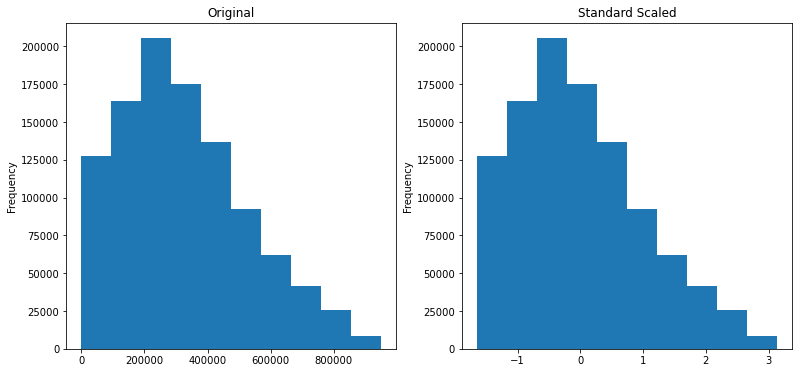

In [12]:
#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))

plt.subplot(121)
train.tax_value.plot.hist(title='Original')


plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Standard Scaled');

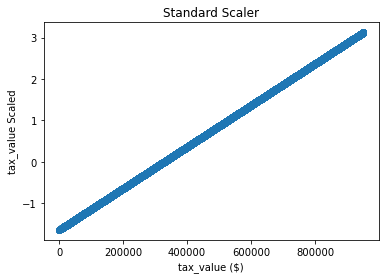

In [13]:
plt.scatter(train.tax_value, train.tax_value_scaled)
plt.xlabel('tax_value ($)')
plt.ylabel('tax_value Scaled')
plt.title('Standard Scaler');

## Robust Scaler

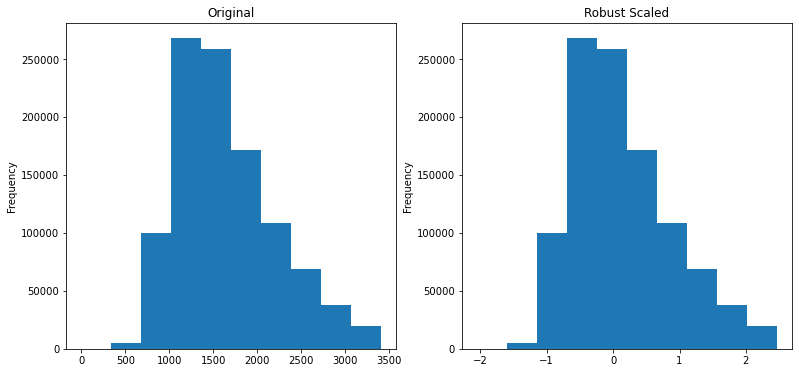

In [14]:
# 1. create the object
scaler_robust = sklearn.preprocessing.RobustScaler()

# 2. fit the object
scaler_robust.fit(train[['area']])

# 3. use the object
train['area_scaled'] = scaler_robust.transform(train[['area']])
test['area_scaled'] = scaler_robust.transform(test[['area']])
validate['area_scaled'] = scaler_robust.transform(validate[['area']])

#plot the scaled and unscaled distributions
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.area.plot.hist(title='Original')
plt.subplot(122)
train.area_scaled.plot.hist(title='Robust Scaled');

## Inverse Scaler

In [15]:
train.area_scaled.values

array([ 0.01721854,  0.29403974, -0.12715232, ...,  0.77350993,
       -1.01721854, -0.55099338])

In [17]:
train['inverse_calculatedfinishedsquarefeet_scaled'] = scaler_robust.inverse_transform(train.area_scaled.values.reshape(-1,1))


In [18]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,bedrooms_scaled,taxamount_scaled,tax_value_scaled,area_scaled,inverse_calculatedfinishedsquarefeet_scaled
10057,4.0,2.0,1561,248240.0,1973.0,2504.40,6059.0,0.666667,0.239843,-0.400643,0.017219,1561.0
2004969,3.0,2.0,1770,88390.0,1960.0,1671.93,6037.0,0.333333,0.159469,-1.203960,0.294040,1770.0
306031,2.0,1.0,1452,81169.0,1946.0,1310.88,6037.0,0.000000,0.124610,-1.240249,-0.127152,1452.0
1038594,3.0,1.0,1000,119174.0,1950.0,1900.28,6037.0,0.333333,0.181516,-1.049257,-0.725828,1000.0
270959,3.0,2.0,1974,432268.0,1988.0,5315.27,6037.0,0.333333,0.511229,0.524179,0.564238,1974.0


## Quantile Transformer

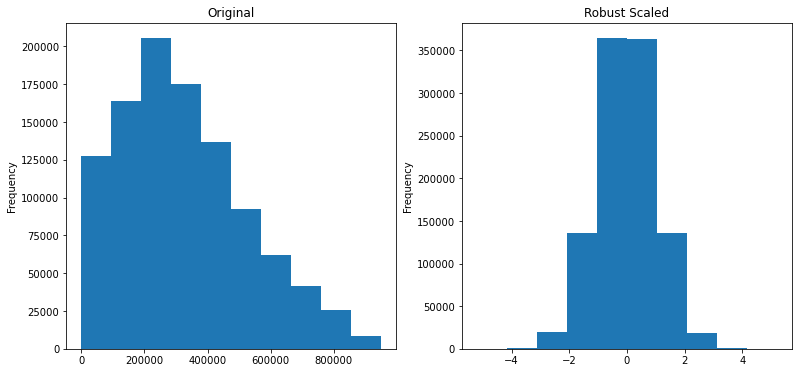

In [22]:
# 1. create the object
scaler_Q = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object
scaler_Q.fit(train[['tax_value']])

# 3. use the object. Scale total_bill only
train['tax_value_scaled'] = scaler_Q.transform(train[['tax_value']])
test['tax_value_scaled'] = scaler_Q.transform(test[['tax_value']])
validate['tax_value_scaled'] = scaler_Q.transform(validate[['tax_value']])


plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Robust Scaled');

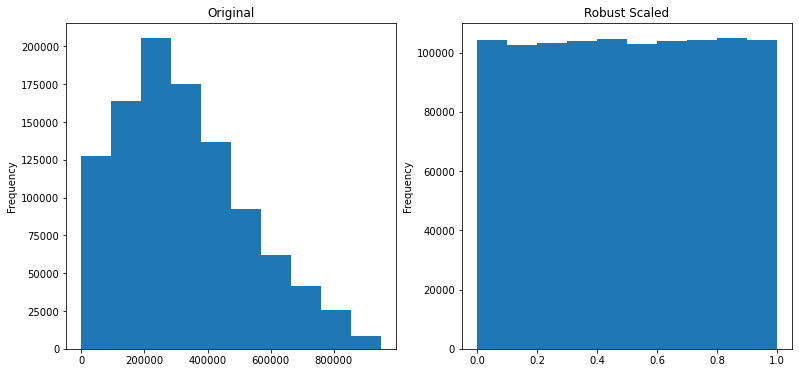

In [23]:
# 1. create the object
scaler_Q_uniform = sklearn.preprocessing.QuantileTransformer()

# 2. fit the object
scaler_Q_uniform.fit(train[['tax_value']])

# 3. use the object. Scale total_bill only
train['tax_value_scaled'] = scaler_Q_uniform.transform(train[['tax_value']])
test['tax_value_scaled'] = scaler_Q_uniform.transform(test[['tax_value']])
validate['tax_value_scaled'] = scaler_Q_uniform.transform(validate[['tax_value']])


plt.figure(figsize=(13, 6))
plt.subplot(121)
train.tax_value.plot.hist(title='Original')
plt.subplot(122)
train.tax_value_scaled.plot.hist(title='Robust Scaled');